**HOMEWORK EDA**

Nama     : Dika Kencana Putera

Kelompok : Deep Learning 4.0

# DESCRIPTIVE STATISTICS

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
#import dataset
df = pd.read_csv("E:/DIKA's/DATA PRODUKTIF DIKA/DATA SCIENCE/Rakamin/Dataset/in-vehicle-coupon-recommendation.csv")

#checking dataset info
print('Dataset Info: ')
print(df.info())

#checking missing values in dataset
print('Missing Values: ')
print(df.isna().sum())

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                  

In [41]:
#showing off the whole data
pd.set_option('display.max_columns', None)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
#looping to categorize cat include categorical columns and num include numeric columns
cat = []
num = []
for col in df.columns: 
    if df[col].dtype == 'O':
        cat.append(col)
    else: 
        num.append(col)

In [31]:
df[num].describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df[cat].describe()

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,108,12577,12467,12533,12554,12495
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6283,7305,10069,3230,3996,7091,6511,2653,5100,4351,1870,2013,22,5197,3385,4672,5376,6077


In [6]:
#checking unique value
print(df['passanger'].value_counts())
print(df['age'].value_counts())
print(df['income'].value_counts())

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64


*Pertanyaan*

1. Apakah ada kolom dengan tipe data kurang sesuai atau nama kolom dan isinya kurang sesuai?

Kolom temprature lebih cocok diubah menjadi dtypes objek karena memiliki tipe data ordinal. Kolom age dan occupation terlalu banyak valuenya, dapat diringkas menjadi bentuk beberapa klasifikasi saja.

2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

nilai kosong terdapat pada kolom Car(99,14%), Bar(0,84%), CoffeeHouse(1,71%), CarryAway(1,19%), RestaurantLessThan20(1.02%) dan Restaurant20to50(1.49%).

3. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)?

Kolom direction_same memiliki nilai mean yang rendah dan direction_opp memiliki nilai mean yang tinggi, hal ini dapat disebabkan banyaknya sekanario destinasi kupon berada di posisi yang berseberangan dengan posisi pengemudi serta valuenya memiliki konteks yang sama. Kolom toCoupon_GEQ5min hanya memiliki 1 unique value.

# UNIVARIATE ANALYSIS

In [5]:
num

['temperature',
 'has_children',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y']

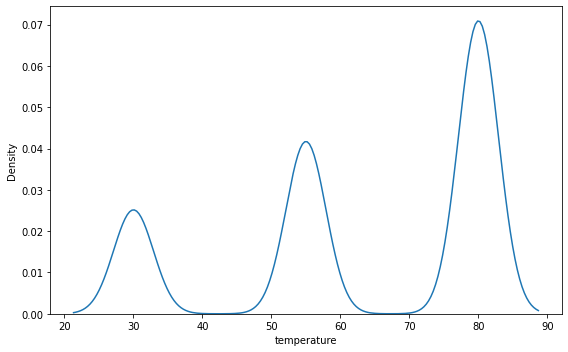

In [5]:
plt.figure(figsize= (8, 5))
sns.kdeplot(x = df['temperature'])
#plt.savefig('ua.png')
plt.tight_layout()

1. fitur temperature memiliki distribusi trimodal, hal ini dikarenakan value pada fitur tersebut merupakan kategorikal sehingga distribusi data terkumpul pada 3 unique value tersebut

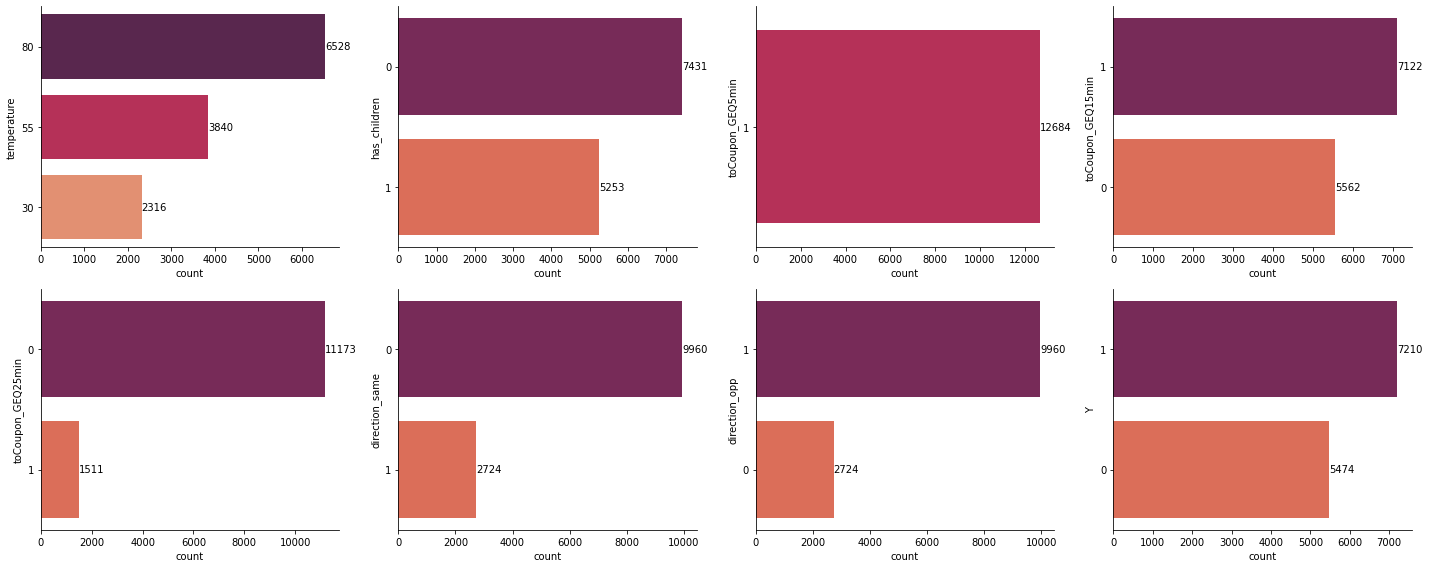

In [9]:
plt.figure(figsize=(20,8))
for i in range(len(num)):
    plt.subplot(2, 4, i+1)
    ax = sns.countplot(y=num[i], data=df, palette='rocket', order=df[num[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    sns.despine()
plt.tight_layout()
plt.savefig('ua_bar_num.png')

2. Fitur toCoupon_GEQ5min hanya memiliki 1 unique value. Karena dirasa fitur ini tidak dapat memberika insight, maka akan didrop pada tahap pre-processing.
3. Fitur direction_opp perlu didrop ketika data pre-processing karena fitur tersebut memiliki value yang artinya sama dengan fitur direction_same, maka hanya memerlukan salah satunya saja.


In [11]:
cat

['destination',
 'passanger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

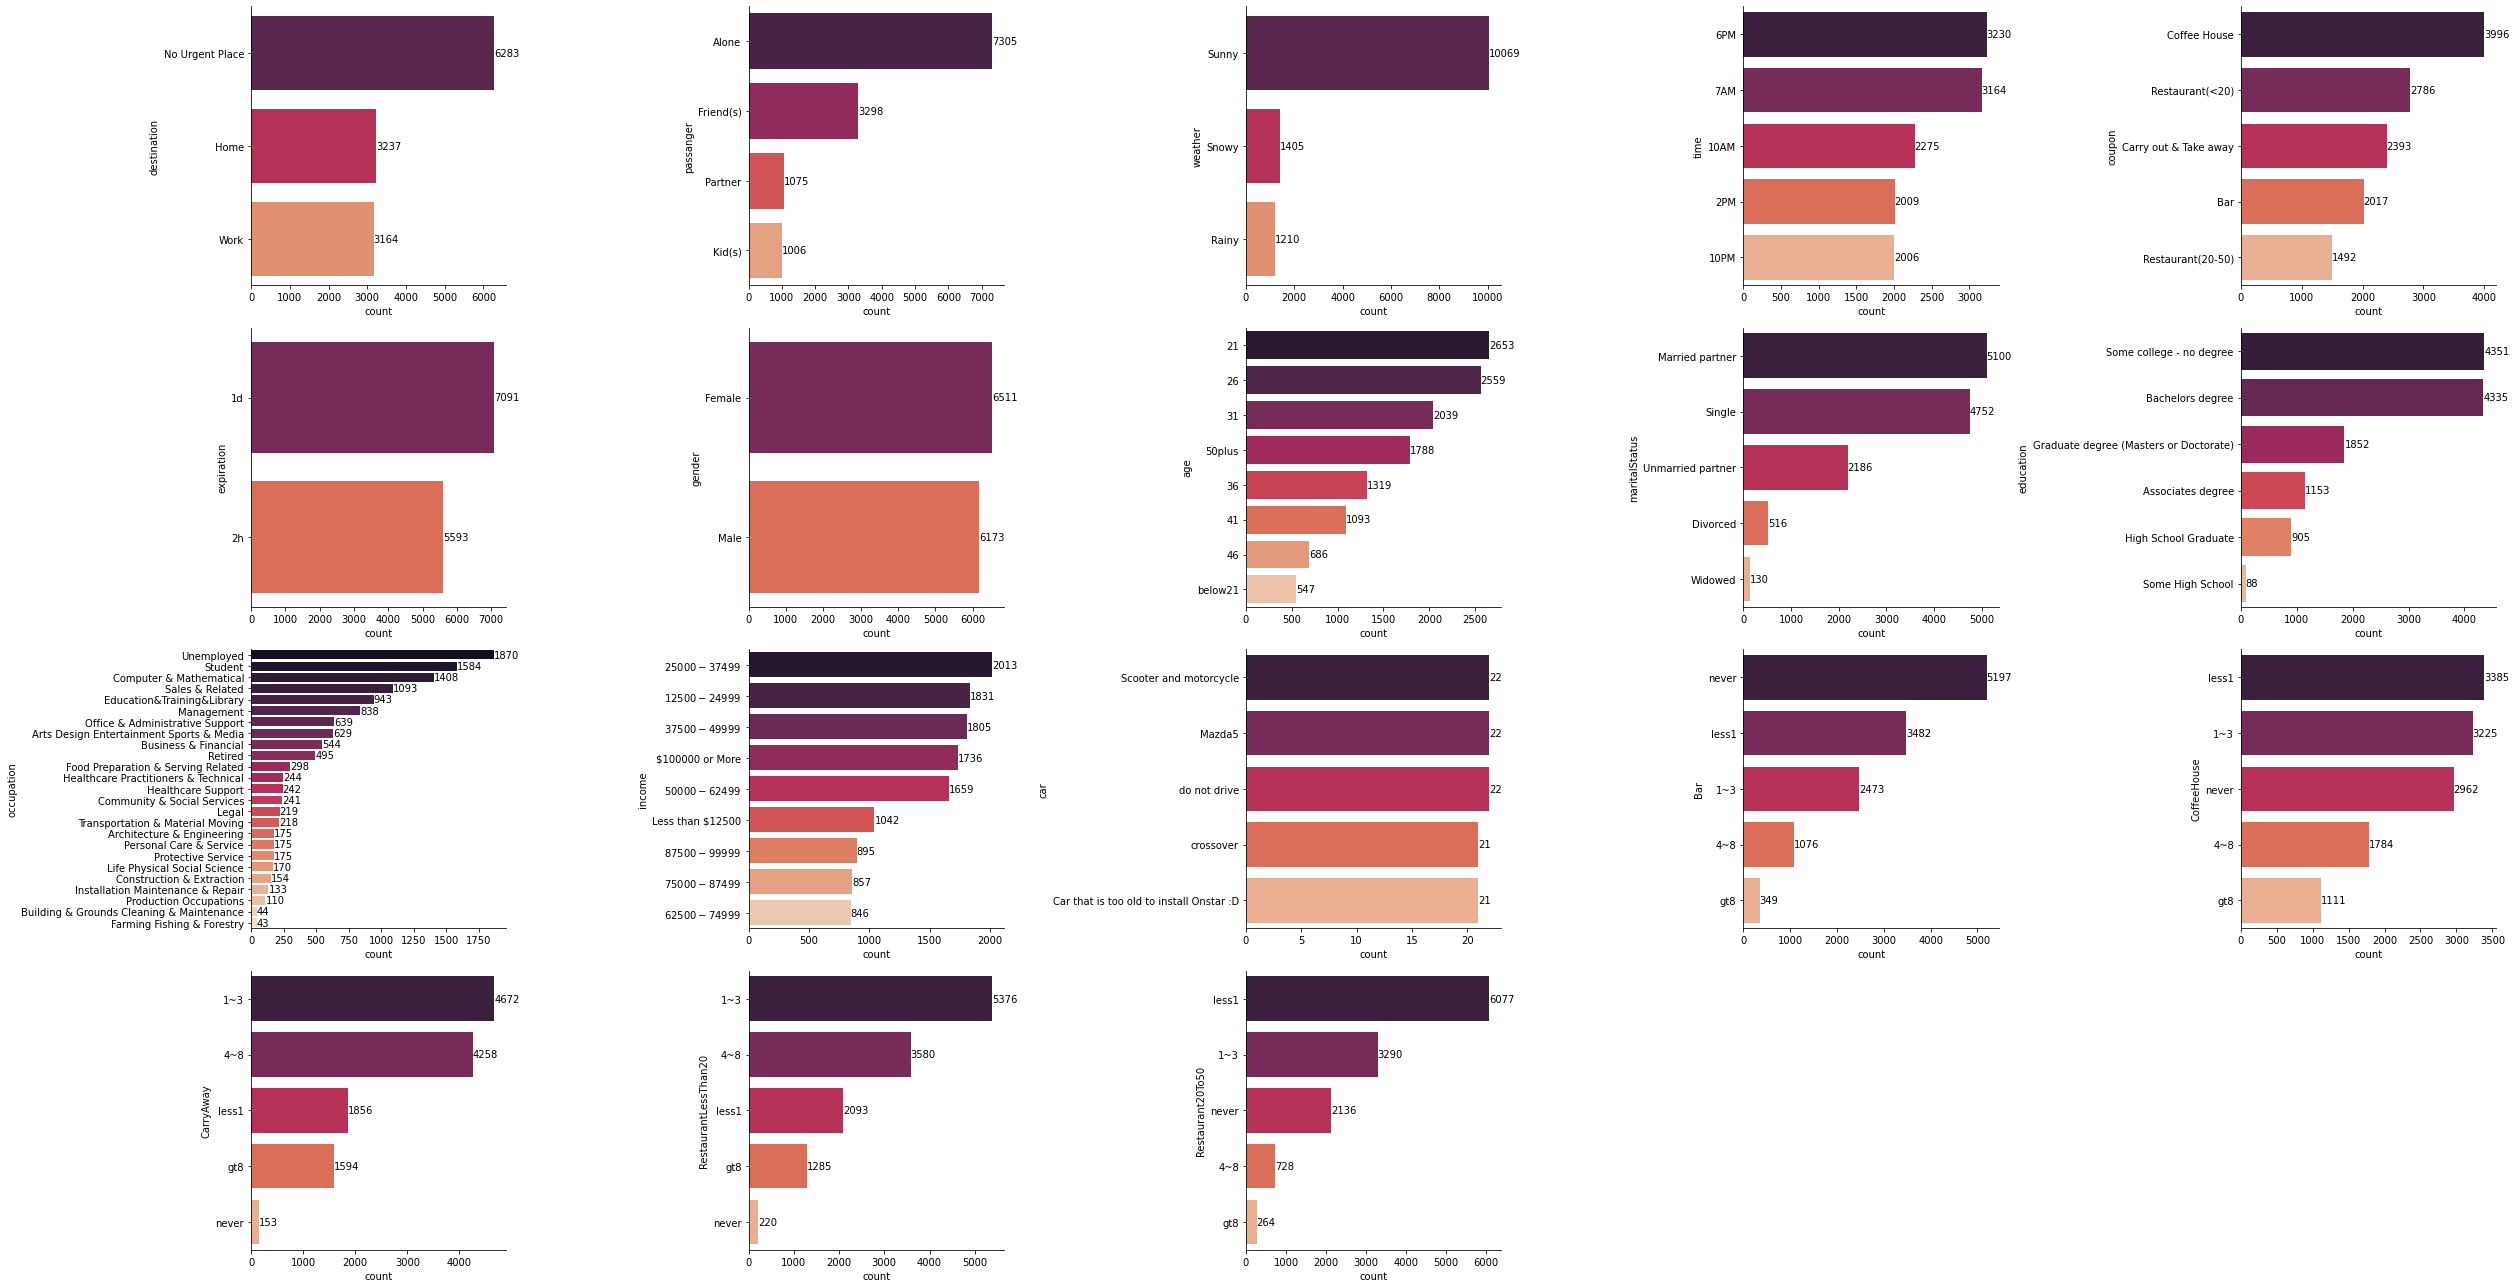

In [27]:
plt.figure(figsize=(35,18))
for i in range(len(cat)):
    plt.subplot(4, 5, i+1)
    ax = sns.countplot(y=cat[i], data=df, palette='rocket', order=df[cat[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    sns.despine()
plt.tight_layout()
plt.savefig('ua_bar.png')

4. Fitur occupation terlalu banyak kategorinya, perlu diringkas kategorinya pada saat data pre-processing. Pada fitur occupation didominasi oleh kategori unemployed.
5. itur age dapat diringkas kategorinya pada saat data pre-processing.
6. Fitur car terlalu banyak missing valuesnya, maka perlu didrop ketika data pre-processing.
7. Fitur destination didominasi oleh 'No Urgent Place’, fitur passanger didominasi oleh 'Alone’, fitur weather didominasi oleh 'Sunny’, fitur bar didominasi oleh 'never’, fitur RestaurantLessThan20 didominasi oleh '1~3’, fitur Restaurant20to50 didominasi oleh 'less1’, fitur coupon didominasi oleh CoffeeHouse.




# MULTIVARIATE ANALYSIS

In [28]:
#import dataset as dummy
df_dummy = pd.read_csv("E:/DIKA's/DATA PRODUKTIF DIKA/DATA SCIENCE/Rakamin/Dataset/in-vehicle-coupon-recommendation.csv")
pd.set_option('display.max_columns', None)
df_dummy.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [29]:
df_dummy = df_dummy.drop(columns='car')

In [6]:
#checking age unique value
df['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [30]:
#categorize it to be more simple
age_list = []
for i in df['age']:
    if i == 'below21':
        age = '<21'
    elif i == '21' or i == '26':
        age = '21-30'
    elif i == '31' or i == '36':
        age = '31-40'
    elif i == '41' or i == '46':
        age = '41-50'
    else:
        age = '>50'
    age_list.append(age)
df_dummy['age'] = age_list

In [7]:
#checking new age unique value
df_dummy['age'].value_counts()

21-30    5212
31-40    3358
>50      1788
41-50    1779
<21       547
Name: age, dtype: int64

In [29]:
#checking occupation unique value
df['occupation'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [31]:
#categorize it to be more simple
occupation_list = []
for i in df['occupation']:
    if i == 'Installation Maintenance & Repair' or i == 'Transportation & Material Moving' or i == 'Food Preparation & Serving Related' or i == 'Building & Grounds Cleaning & Maintenance':
        occupation = 'Crafts'
    elif i == 'Architecture & Engineering' or i == 'Education&Training&Library' or i == 'Healthcare Practitioners & Technical' or i == 'Management' or i == 'Arts Design Entertainment Sports & Media' or i == 'Computer & Mathematical' or i == 'Legal' or i == 'Business & Financial':
        occupation = 'Professionals'
    elif i == 'Retired':
        occupation = 'Retired'
    elif i == 'Sales & Related' or i == 'Personal Care & Service' or i == 'Protective Service':
        occupation = 'Service and sales'
    elif i == 'Student':
        occupation = 'Student'
    elif i == 'Healthcare Support' or i == 'Life Physical Social Science' or i == 'Community & Social Services' or i == 'Construction & Extraction':
        occupation = 'Technicians'
    elif i == 'Unemployed':
        occupation = 'Unemployed'
    else:
        occupation = 'Others'
    occupation_list.append(occupation)
df_dummy['occupation'] = occupation_list

In [9]:
#checking new occupation unique value
df_dummy['occupation'].value_counts()

Professionals        5000
Unemployed           1870
Student              1584
Service and sales    1443
Technicians           807
Others                792
Crafts                693
Retired               495
Name: occupation, dtype: int64

In [33]:
df['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [93]:
df['weather'].value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

In [32]:
#label encoding proccess
df_ma = df_dummy.replace({'expiration':{'2h': 0, '1d' : 1},
                    'gender':{'Male': 0, 'Female' : 1},
                    'age':{'<21': 0, '21-30': 1, '31-40': 2, '41-50': 3, '>50': 4},
                    'education':{'Some High School': 0, 'High School Graduate': 1, 'Some college - no degree': 2, 'Associates degree': 3, 'Bachelors degree': 4, 'Graduate degree (Masters or Doctorate)': 5},
                    'Bar':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'CoffeeHouse':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'CarryAway':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'RestaurantLessThan20':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'Restaurant20To50':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'temperature':{30: 0, 55: 1, 80: 2}})
df_ma.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,1,2PM,Restaurant(<20),1,1,1,Unmarried partner,1,2,Unemployed,$37500 - $49999,0.0,0.0,NaN,3.0,2.0,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,2,10AM,Coffee House,0,1,1,Unmarried partner,1,2,Unemployed,$37500 - $49999,0.0,0.0,NaN,3.0,2.0,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,2,10AM,Carry out & Take away,0,1,1,Unmarried partner,1,2,Unemployed,$37500 - $49999,0.0,0.0,NaN,3.0,2.0,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,2,2PM,Coffee House,0,1,1,Unmarried partner,1,2,Unemployed,$37500 - $49999,0.0,0.0,NaN,3.0,2.0,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,2,2PM,Coffee House,1,1,1,Unmarried partner,1,2,Unemployed,$37500 - $49999,0.0,0.0,NaN,3.0,2.0,1,1,0,0,1,0


In [33]:
obj_df_ma = df_ma.select_dtypes(include=['object']).copy()
obj_df_ma.head()

,destination,passanger,weather,time,coupon,maritalStatus,occupation,income
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),Unmarried partner,Unemployed,$37500 - $49999
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,Unmarried partner,Unemployed,$37500 - $49999
2,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,Unmarried partner,Unemployed,$37500 - $49999
3,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,Unmarried partner,Unemployed,$37500 - $49999
4,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,Unmarried partner,Unemployed,$37500 - $49999


In [34]:
df_ma = df_ma.drop(['destination', 'passanger', 'weather', 'time', 'coupon', 'maritalStatus', 'occupation', 'income'], axis=1)

In [35]:
obj_df_ma_1 = obj_df_ma.astype('category')
obj_df_ma_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   destination    12684 non-null  category
 1   passanger      12684 non-null  category
 2   weather        12684 non-null  category
 3   time           12684 non-null  category
 4   coupon         12684 non-null  category
 5   maritalStatus  12684 non-null  category
 6   occupation     12684 non-null  category
 7   income         12684 non-null  category
dtypes: category(8)
memory usage: 101.0 KB


In [36]:
obj_df_ma_1['destination'] = obj_df_ma_1['destination'].cat.codes
obj_df_ma_1['passanger'] = obj_df_ma_1['passanger'].cat.codes
obj_df_ma_1['weather'] = obj_df_ma_1['weather'].cat.codes
obj_df_ma_1['time'] = obj_df_ma_1['time'].cat.codes
obj_df_ma_1['coupon'] = obj_df_ma_1['coupon'].cat.codes
obj_df_ma_1['maritalStatus'] = obj_df_ma_1['maritalStatus'].cat.codes
obj_df_ma_1['occupation'] = obj_df_ma_1['occupation'].cat.codes
obj_df_ma_1['income'] = obj_df_ma_1['income'].cat.codes
obj_df_ma_1.head()

,destination,passanger,weather,time,coupon,maritalStatus,occupation,income
0,1,0,2,2,4,3,7,3
1,1,1,2,0,2,3,7,3
2,1,1,2,0,1,3,7,3
3,1,1,2,2,2,3,7,3
4,1,1,2,2,2,3,7,3


In [45]:
df_final_2 = pd.concat([df_ma, obj_df_ma_1], axis=1)
df_final_2 = df_final_2[['destination', 'passanger', 'weather', 'time', 'coupon', 'maritalStatus', 'occupation', 'income', 'temperature', 'expiration', 'gender', 'age', 'has_children',
            'education', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
            'direction_same', 'direction_opp', 'Y']]

In [143]:
df_final_2['destination'].value_counts()

1    6283
0    3237
2    3164
Name: destination, dtype: int64

In [98]:
df_ma_final = pd.get_dummies(df_ma, columns=['destination', 'passanger', 'weather', 'time', 'coupon', 'maritalStatus', 'occupation', 'income'],
            prefix=['dest', 'pass', 'weather', 'time', 'coupon', 'marital', 'occup', 'income'])
df_ma_final.head()

,temperature,expiration,gender,age,has_children,education,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,dest_Home,dest_No Urgent Place,dest_Work,pass_Alone,pass_Friend(s),pass_Kid(s),pass_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),marital_Divorced,marital_Married partner,marital_Single,marital_Unmarried partner,marital_Widowed,occup_Crafts,occup_Others,occup_Professionals,occup_Retired,occup_Service and sales,occup_Student,occup_Technicians,occup_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500
0,1,1,1,1,1,2,0.0,0.0,NaN,3.0,2.0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2,0,1,1,1,2,0.0,0.0,NaN,3.0,2.0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,2,0,1,1,1,2,0.0,0.0,NaN,3.0,2.0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,2,0,1,1,1,2,0.0,0.0,NaN,3.0,2.0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,2,1,1,1,1,2,0.0,0.0,NaN,3.0,2.0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


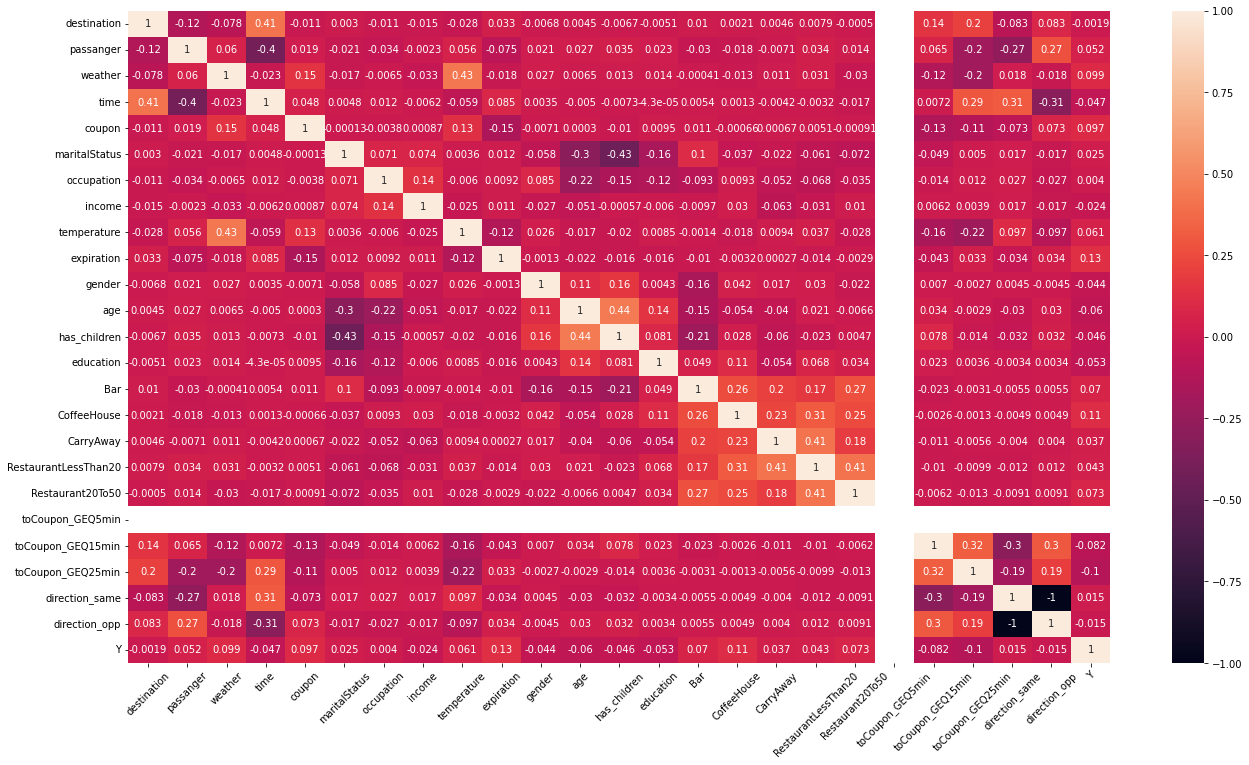

In [46]:
plt.figure(figsize = (22,12))
sns.heatmap(df_final_2.corr(), annot=True)
plt.xticks(rotation=45)
plt.savefig('ma.png')
plt.show()


A. Berdasarkan hasil perhtungan korelasi maka kolom fitur yang relevan ialah: 
1. Passanger
2. Time
3. Weather
4. Coupon
5. Temperature
6. Expiration
7. Age
8. Education
8. Bar
9. CoffeeHouse
10. Carry Away
11. RestauranLessThan 20
12. Restaurant 20 To 50
13. direction_same
14. toCoupon_GEQ 15 min
15. toCoupon_GEQ 25 min

B. Adapun fitur yang dirasa memiliki korelasi terhadap target tetapi berdasarkan perhitungan korelasi nilainya sangat kecil seperti
destination, time, direction_same Pendugaan sejauh ini karena fitur tersebut tidak cocok dilakukan label encoding karena tipe
data pada fitur terebut bukanlah ordinal/ 2 unique values

C. Selain itu fitur lainnya yang dirasa memiliki korelasi terhadap target tetapi berdasarkan perhitungan korelasi nilainya sangat
kecil seperti CarryAway dan RestaurantLessThan 20 Pendugaan sejauh ini karena fitur tersebut masih memiliki missing
values ketika dilakukan perhitungan korelasi sehingga nilainya menjadi lebih kecil dari yang seharusnya

D. Fitur direction_same memiliki nilai korelasi sempurna dengan direction_opp hal ini memperkuat tujuan aal untuk drop salah
satunya agar tidak menimbulkan multicollinearity

In [57]:
def show_val(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = b.get_height()
        ax.text(x, y, val, ha = 'center')
        
def show_val_percent(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = f'{b.get_height():.2f}%'
        ax.text(x, y, val, ha = 'center')
        
def show_val_int(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = int(b.get_height())
        ax.text(x, y, val, ha = 'center')

In [58]:
def df_group(col):
    dfg = df.groupby([col, 'Y']).agg({'toCoupon_GEQ5min':'count'}).reset_index()
    dfg_sum = df.groupby(col).agg({'toCoupon_GEQ5min':'count'})
    dfg = dfg.merge(dfg_sum, on = col)
    dfg.rename(columns={'toCoupon_GEQ5min_x':'customers', 'toCoupon_GEQ5min_y':'total_customer'}, inplace=True)
    dfg['percentage'] = round((dfg['customers']/dfg['total_customer']) * 100, 2)
    return dfg

def barplot(col):
    df1 = df_group(col)
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.barplot(x = col, y= 'customers', hue = 'Y', data = df1, ax = ax[0])
    ax[0].set_ylabel('Total Customer')
    show_val_int(ax[0])
    sns.barplot(x = col, y= 'percentage', hue = 'Y', data = df1, ax = ax[1])
    show_val_percent(ax[1])
    
def continousplot(col):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.boxplot(x = 'Y', y = col, data = df, ax = ax[0])
    sns.histplot(x = col, hue = 'Y', data = df, ax = ax[1])

In [13]:
cat

['destination',
 'passanger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

In [35]:
num

['temperature',
 'has_children',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y']

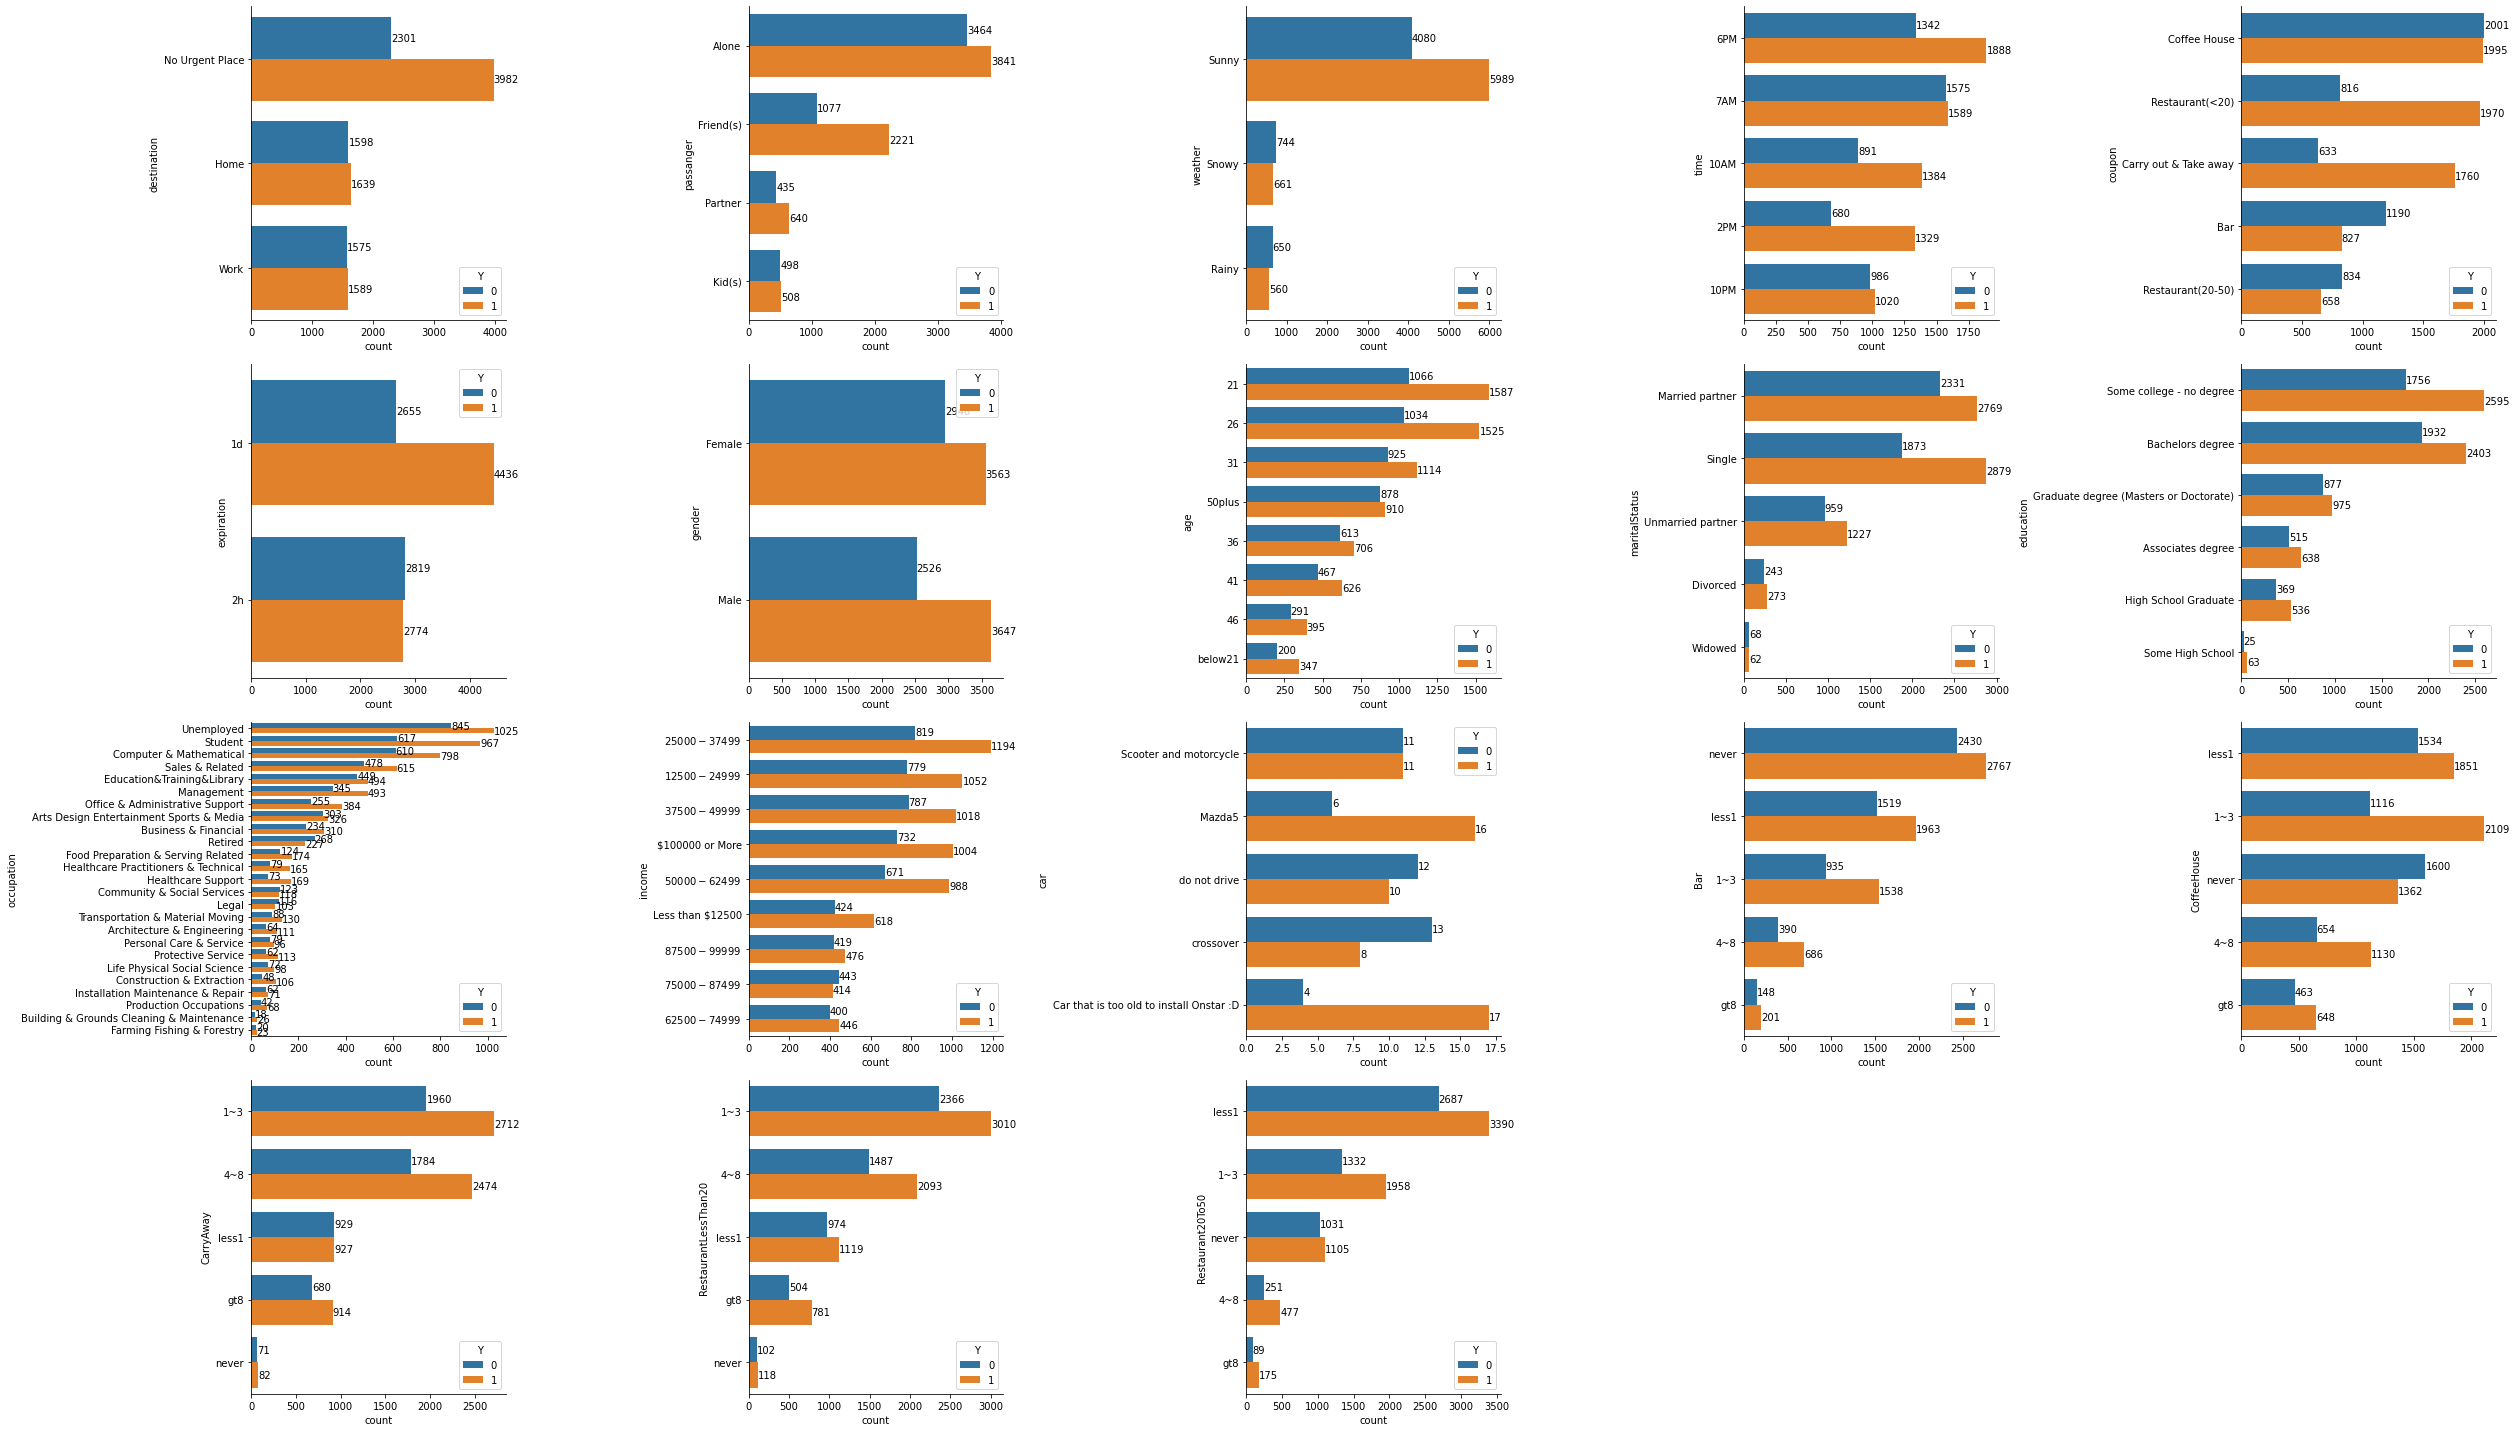

In [56]:
plt.figure(figsize = (35,20))
for i in range(len(cat)):
    plt.subplot(4, 5, i+1)
    ax = sns.countplot(y = cat[i], hue = 'Y', data = df, order=df[cat[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    sns.despine()
plt.tight_layout()
plt.savefig('ma_bar.png')

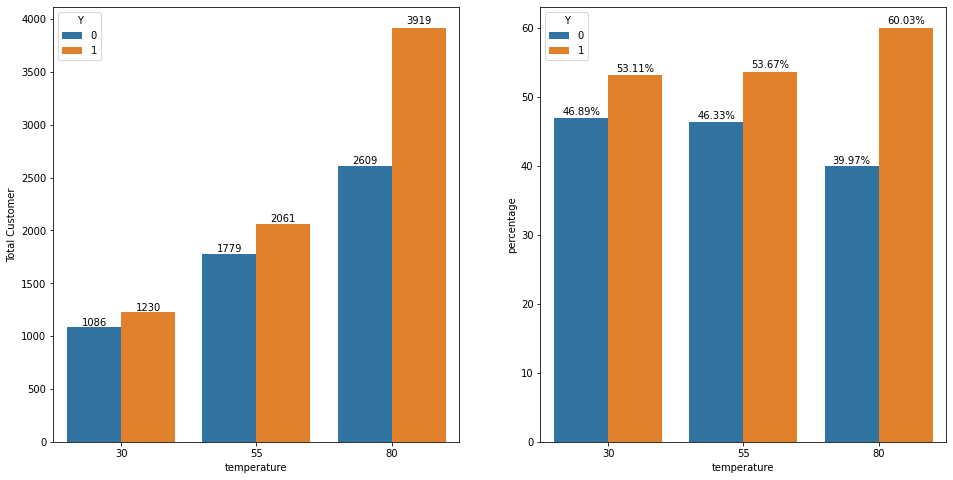

In [21]:
barplot('temperature')

Pada fitur "destination" nampak bahwa pengendara yang paling banyak menerima kupon adalah pendedara dengan yang memiliki destinasi "No Urgent Place" sementara pada destinasi "home" dan "work" memiliki nilai setara lebih rendah .

Pada fitur "weather" diketahui bahwa kupon paling banyak diterima oleh pengendara dalam kondisi cuaca "sunny" dibanding "snowy" dan "rainy“

Diketahui "time" penerimaan kupon yang paling banyak adalah pada waktu “10AM”, “2PM" dan “6PM" dibanding waktu lainnya. 

Diketahui pada fitur "jenis kupon" kupon yang paling banyak diterima oleh pengendara adalah jenis kupon "RestaurantLessThan20" dan "carry out and take away".

pada fitur "expiration" kupon lebih banyak dipilih pada kategori expiration "1d" dibanding "2h".

Pada fitur "marital status" penerima kupon didominasi oleh pengendara dengan status "single" dan "marriage couple".

Pada tingkat "education" terlihat penerima paling banyak adalah dari status pendidikan "college non-degre" dan"bachelor".

# BUSINESS INSIGHT

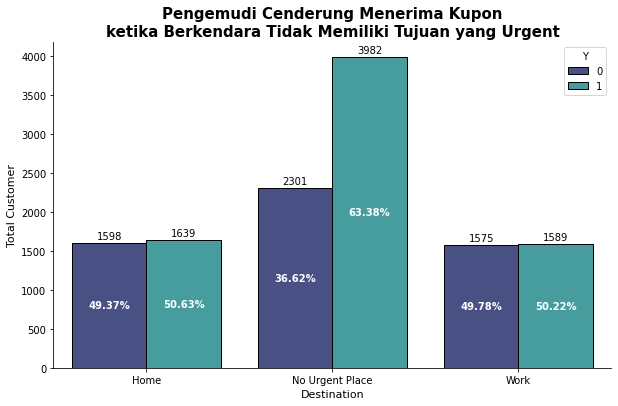

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Pengemudi Cenderung Menerima Kupon\nketika Berkendara Tidak Memiliki Tujuan yang Urgent", fontsize=15, color='black', weight='bold')
sns.barplot(x='destination', y='customers', data=df_group('destination'), hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Destination', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['49.37%', '36.62%', '49.78%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['50.63%', '63.38%', '50.22%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('destination.png')
plt.show()

Jumlah pelanggan pengemudi yang menerima kupon jauh lebih banyak ketika mereka sedang tidak memiliki tujuan tertentu ketika berkendara (3.982). Rasio penerimaan kuponnya pun paling tinggi (63.38%) dibanding yang lainnya. Hal ini disebabkan tidak adanya urgensi ketika berkendara artinya target pelanggan pengemudi memiliki waktu kosong lebih untuk mengunjungi lokasi kupon untuk digunakan maka dari itu tingkat penerimaannya lebih tinggi dibanding yang lain.

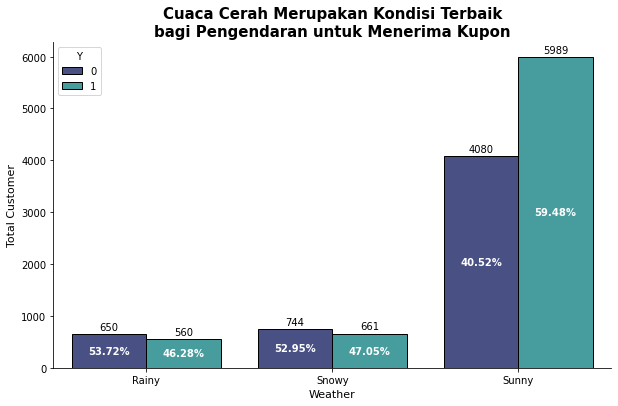

In [73]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Cuaca Cerah Merupakan Kondisi Terbaik\nbagi Pengendaran untuk Menerima Kupon", fontsize=15, color='black', weight='bold')
sns.barplot(x='weather', y='customers', data=df_group('weather'), hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Weather', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['53.72%', '52.95%', '40.52%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['46.28%', '47.05%', '59.48%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('weather.png')
plt.show()

Jumlah pelanggan pengemudi yang menerima kupon jauh lebih banyak ketika cuaca cerah (10.0970, selain itu rasio yang menerima kupon pun paling tinggi (59.48%) dibandingkan kondisi cuaca lainnya. Hal ini dapat disebabkan karena pelanggan pengemudi tidak banyak yang keluar rumah beraktivitas ketika cuaca hujan atau bersalju. Oleh karena itu sangat disarankan campaign pemberian kupon diadakan pada musim panas /semi Hindari mengadakan campaign pemberian kupon pada musim hujan salju.

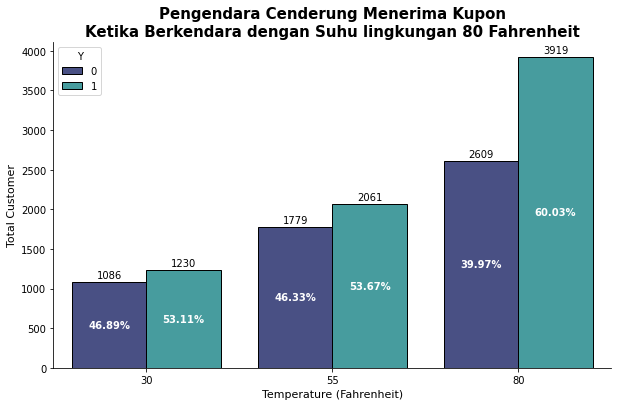

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Pengendara Cenderung Menerima Kupon\nKetika Berkendara dengan Suhu lingkungan 80 Fahrenheit", fontsize=15, color='black', weight='bold')
sns.barplot(x='temperature', y='customers', data=df_group('temperature'), hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Temperature (Fahrenheit)', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['46.89%', '46.33%', '39.97%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['53.11%', '53.67%', '60.03%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('temperature.png')
plt.show()

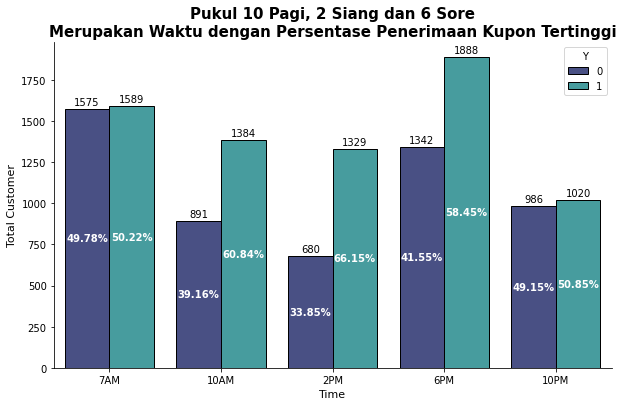

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Pukul 10 Pagi, 2 Siang dan 6 Sore\nMerupakan Waktu dengan Persentase Penerimaan Kupon Tertinggi", fontsize=15, color='black', weight='bold')
sns.barplot(x='time', y='customers', data=df_group('time'), hue='Y', order=['7AM', '10AM', '2PM', '6PM', '10PM'], edgecolor='black', palette='mako')

plt.xlabel('Time', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['49.78%', '39.16%', '33.85%', '41.55%', '49.15%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['50.22%', '60.84%', '66.15%', '58.45%', '50.85%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('time_png')
plt.show()

In [63]:
df_6pm = df[df['time'] == '6PM'].groupby(['destination', 'Y']).agg({'toCoupon_GEQ5min':'count'}).reset_index()
df_6pm_sum = df_6pm.groupby('destination').agg({'toCoupon_GEQ5min':'sum'})
df_6pm = df_6pm.merge(df_6pm_sum, on = 'destination')
df_6pm.rename(columns={'toCoupon_GEQ5min_x':'customers', 'toCoupon_GEQ5min_y':'total_customer'}, inplace=True)
df_6pm['percentage'] = round((df_6pm['customers']/df_6pm['total_customer']) * 100, 2)
df_6pm

,destination,Y,customers,total_customer,percentage
0,Home,0,969,2123,45.64
1,Home,1,1154,2123,54.36
2,No Urgent Place,0,373,1107,33.69
3,No Urgent Place,1,734,1107,66.31


In [74]:
df_10am = df[df['time'] == '10AM'].groupby(['destination', 'Y']).agg({'toCoupon_GEQ5min':'count'}).reset_index()
df_10am_sum = df_10am.groupby('destination').agg({'toCoupon_GEQ5min':'sum'})
df_10am = df_10am.merge(df_10am_sum, on = 'destination')
df_10am.rename(columns={'toCoupon_GEQ5min_x':'customers', 'toCoupon_GEQ5min_y':'total_customer'}, inplace=True)
df_10am['percentage'] = round((df_10am['customers']/df_10am['total_customer']) * 100, 2)
df_10am

,destination,Y,customers,total_customer,percentage
0,No Urgent Place,0,891,2275,39.16
1,No Urgent Place,1,1384,2275,60.84


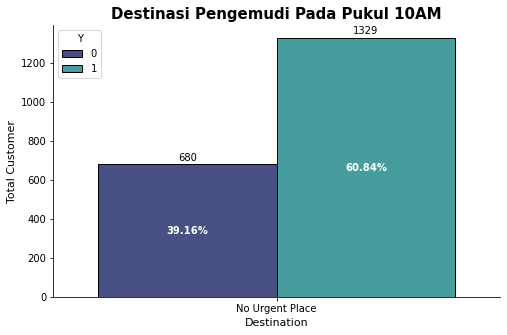

In [75]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Destinasi Pengemudi Pada Pukul 10AM", fontsize=15, color='black', weight='bold')
sns.barplot(x='destination', y='customers', data=df_2pm, hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Destination', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['39.16%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['60.84%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('10am.png')
plt.show()

In [64]:
df_2pm = df[df['time'] == '2PM'].groupby(['destination', 'Y']).agg({'toCoupon_GEQ5min':'count'}).reset_index()
df_2pm_sum = df_2pm.groupby('destination').agg({'toCoupon_GEQ5min':'sum'})
df_2pm = df_2pm.merge(df_2pm_sum, on = 'destination')
df_2pm.rename(columns={'toCoupon_GEQ5min_x':'customers', 'toCoupon_GEQ5min_y':'total_customer'}, inplace=True)
df_2pm['percentage'] = round((df_2pm['customers']/df_2pm['total_customer']) * 100, 2)
df_2pm

,destination,Y,customers,total_customer,percentage
0,No Urgent Place,0,680,2009,33.85
1,No Urgent Place,1,1329,2009,66.15


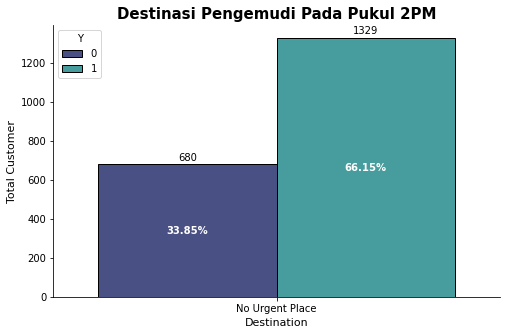

In [66]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Destinasi Pengemudi Pada Pukul 2PM", fontsize=15, color='black', weight='bold')
sns.barplot(x='destination', y='customers', data=df_2pm, hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Destination', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['33.85%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['66.15%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('2pm.png')
plt.show()

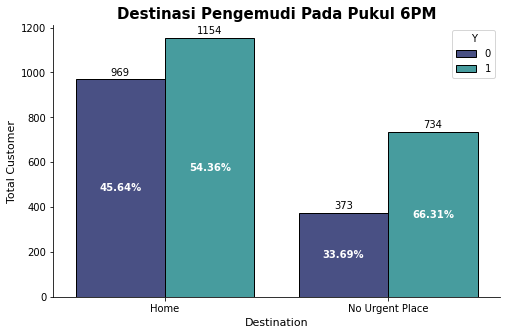

In [67]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Destinasi Pengemudi Pada Pukul 6PM", fontsize=15, color='black', weight='bold')
sns.barplot(x='destination', y='customers', data=df_6pm, hue='Y', edgecolor='black', palette='mako')

plt.xlabel('Destination', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['45.64%', '33.69%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['54.36%', '66.31%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('6pm.png')
plt.show()

Jumlah pelanggan pengemudi yang menerima kupon tinggi pada pukul 10 AM (1.384), 2 PM (1.329) dan 6 PM (1.888). Setelah dianalisis lebih lanjut ternyata hal ini disebabkan oleh destinasi pelanggan pengemudi pada jam tersebut hanya 2, yakni tidak ada destinasi urgent dan rumah Pada pukul 10 AM dan 2 PM pelanggan pengemudi seluruhnya tidak memiliki destinasi urgent. Rasio penerimaan kuponnya pun tinggi yakni (60.84%) dan (66.15%). Lalu, pada pukul 6 PM destinasi pelanggan pengemudi terdiri atas tidak adanya destinasi urgent dan rumah Meskipun begitu rasio penerimaan kuponnya tetap tinggi (54.36%) dan (66.31%). Hal ini dapat disebabkan karena situasi pelanggan pengemudi ketika berkendara pulang ke rumah sembari mencari makanan untuk di rumah.

Berdasarkan variabel destinasi dan waktu maka sangat disarankan pemberian kupon dilakukan secara masif pada pukul 10 AM, 2 PM dan 6 PM. Dikarenakan destinasi pelanggan pengemudi pada pukul 6 PM ada yang ke rumah maka pemberian kupon CarryAway merupakan langkah yang tepat sasaran.

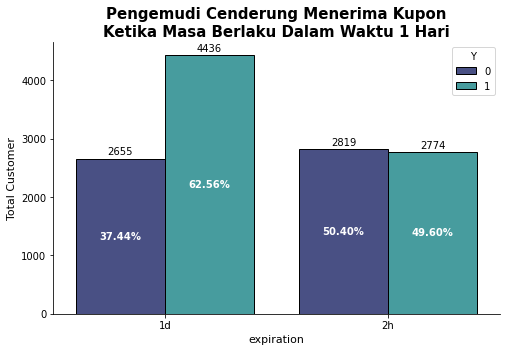

In [68]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Pengemudi Cenderung Menerima Kupon\nKetika Masa Berlaku Dalam Waktu 1 Hari", fontsize=15, color='black', weight='bold')
sns.barplot(x='expiration', y='customers', data=df_group('expiration'), hue='Y', edgecolor='black', palette='mako')

plt.xlabel('expiration', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.bar_label(ax.containers[0], ['37.44%', '50.40%'], label_type='center', color='white', weight='bold')
plt.bar_label(ax.containers[1], ['62.56%', '49.60%'], label_type='center', color='white', weight='bold')

sns.despine()

plt.savefig('expiration.png')
plt.show()

Pelanggan pengemudi yang menerima kupon dengan masa berlaku 1 hari memiliki rasio 62.56%. Sedangkan pelanggan pengemudi yang menerima kupon dengan masa berlaku 2 jam hanya 49.60%. Hal ini dapat disebabkan karena tidak semua pelanggan pengemudi berpikir untuk menggunakan kupon sesegera mungkin karena ada pertimbangan aktivitas lokasi berkendara lokasi penggunaan kupon dll. Oleh karena itu sangat disarankan kupon yang akan diberikan kepada pelanggan pengemudi merupakan kupon yang masih memiliki masa berlaku 1 hari lamanya dan menghindari memberikan kupon yang masa berlakunya sebentar.